# Data Exploration


In [22]:
# %load Model_Pycharm.py
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from termcolor import colored
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
warnings.simplefilter('ignore')
import platform
platform.system()

if platform.system() == 'Windows':
    df_test_original = pd.read_csv("test.csv")
    df_train_original = pd.read_csv("train.csv")
elif platform.system() == 'Linux':
    df_test_original = pd.read_csv("/home/cesarfernando/Cesar/Kaggle/Titanic/test.csv")
    df_train_original = pd.read_csv("/home/cesarfernando/Cesar/Kaggle/Titanic/train.csv")

#df_test_original = pd.read_csv("/home/cesarfernando/Cesar/Kaggle/Titanic/test.csv")
#df_train_original = pd.read_csv("/home/cesarfernando/Cesar/Kaggle/Titanic/train.csv")
#df_train_original.info()
df_test_original.info()
df_train_original.info()
df_test = df_test_original.copy()
df_train = df_train_original.copy()

del df_train['Cabin']
df_train=df_train.dropna(subset=['Age', 'Embarked'])
df_train.info()
col = ['Survived', 'Pclass', 'Sex', 'SibSp']
for i in col:
    print(df_train[i].unique())
#print(women.shape)
#print(sum(women))
#print(len(women))
#print(women)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

In [23]:
df_test_original.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
df_test_original.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
df_test_original.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [26]:
df_train_original['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

#### number of NAN values in df_train

In [27]:
100*df_train_original.isna().sum()/df_train_original.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [28]:
100*df_test_original.isna().sum()/df_test_original.shape[0]

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

MISSING VALS IN THE TRAINING SET:
Age         177
Cabin       687
Embarked      2
dtype: int64


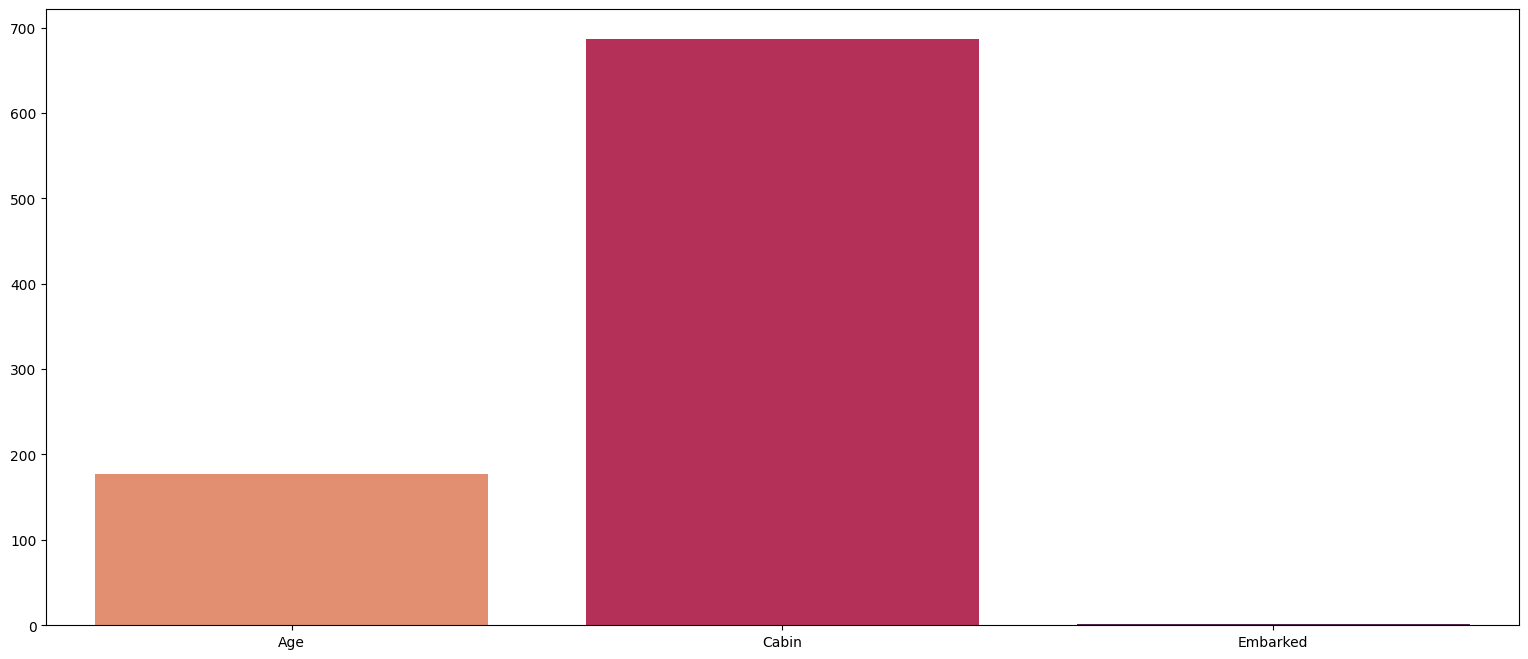

['Age', 'Cabin', 'Embarked']
Age         177
Cabin       687
Embarked      2
dtype: int64


In [29]:
nan_cols = df_train_original.columns[df_train_original.isna().any()].tolist()
plt.figure(figsize=(19,8))
nan_count_cols = df_train_original[nan_cols].isna().sum()
print("MISSING VALS IN THE TRAINING SET:")
print(colored(nan_count_cols, "green"))
sns.barplot(y=nan_count_cols, x=nan_cols, palette='rocket_r')
plt.show()
print(nan_cols)
print(nan_count_cols )

#### number of NAN values in df_test

MISSING VALS IN THE TRAINING SET:
Age       86
Fare       1
Cabin    327
dtype: int64


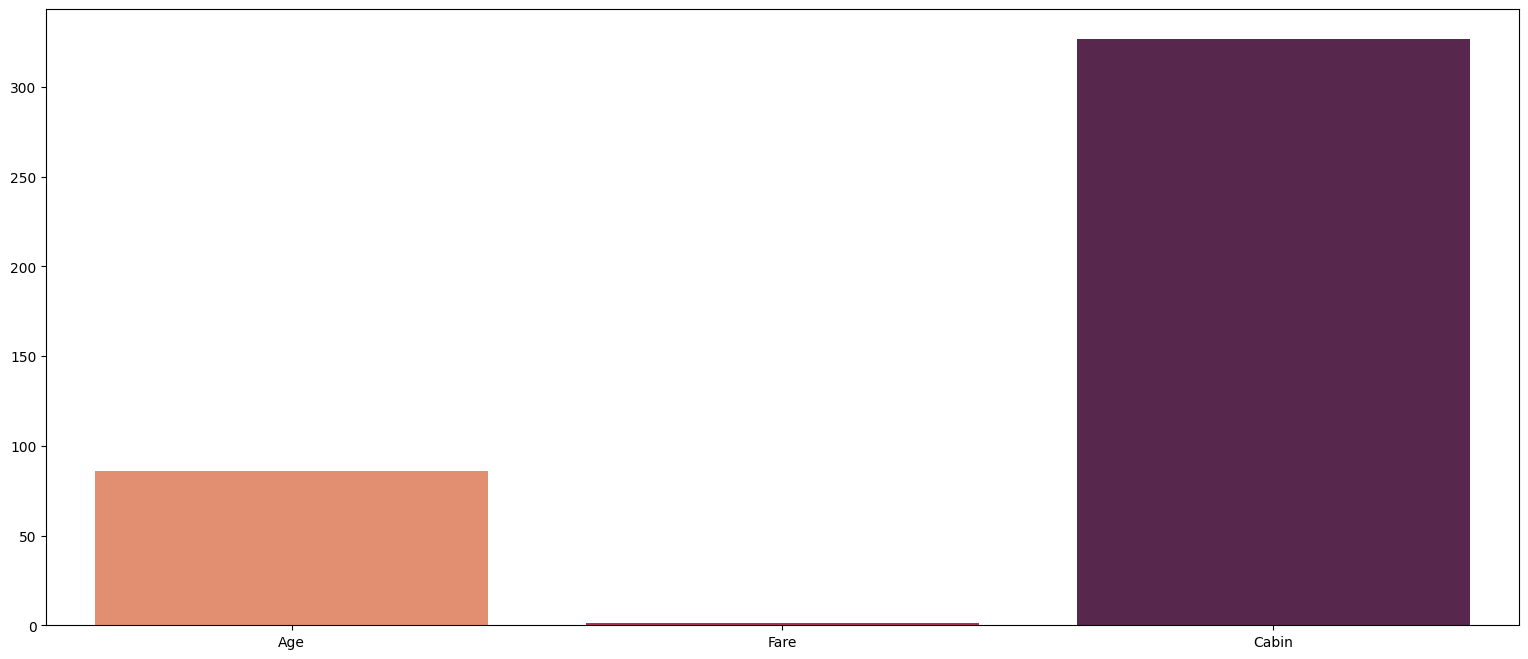

['Age', 'Fare', 'Cabin']


In [30]:
nan_cols = df_test_original.columns[df_test_original.isna().any()].tolist()
plt.figure(figsize=(19,8))
nan_count_cols = df_test_original[nan_cols].isna().sum()
print("MISSING VALS IN THE TRAINING SET:")
print(colored(nan_count_cols, "green"))
sns.barplot(y=nan_count_cols, x=nan_cols, palette='rocket_r')
plt.show()
print(nan_cols)

In [31]:
women = df_train_original.loc[df_train_original.Sex == 'female']["Survived"]
male = df_train_original.loc[df_train_original.Sex == 'male']["Survived"]

rate_women = sum(women)/len(women)
rate_male = sum(male)/len(male)
print(rate_male*100, len(male), rate_women*100, len(women))

18.890814558058924 577 74.20382165605095 314


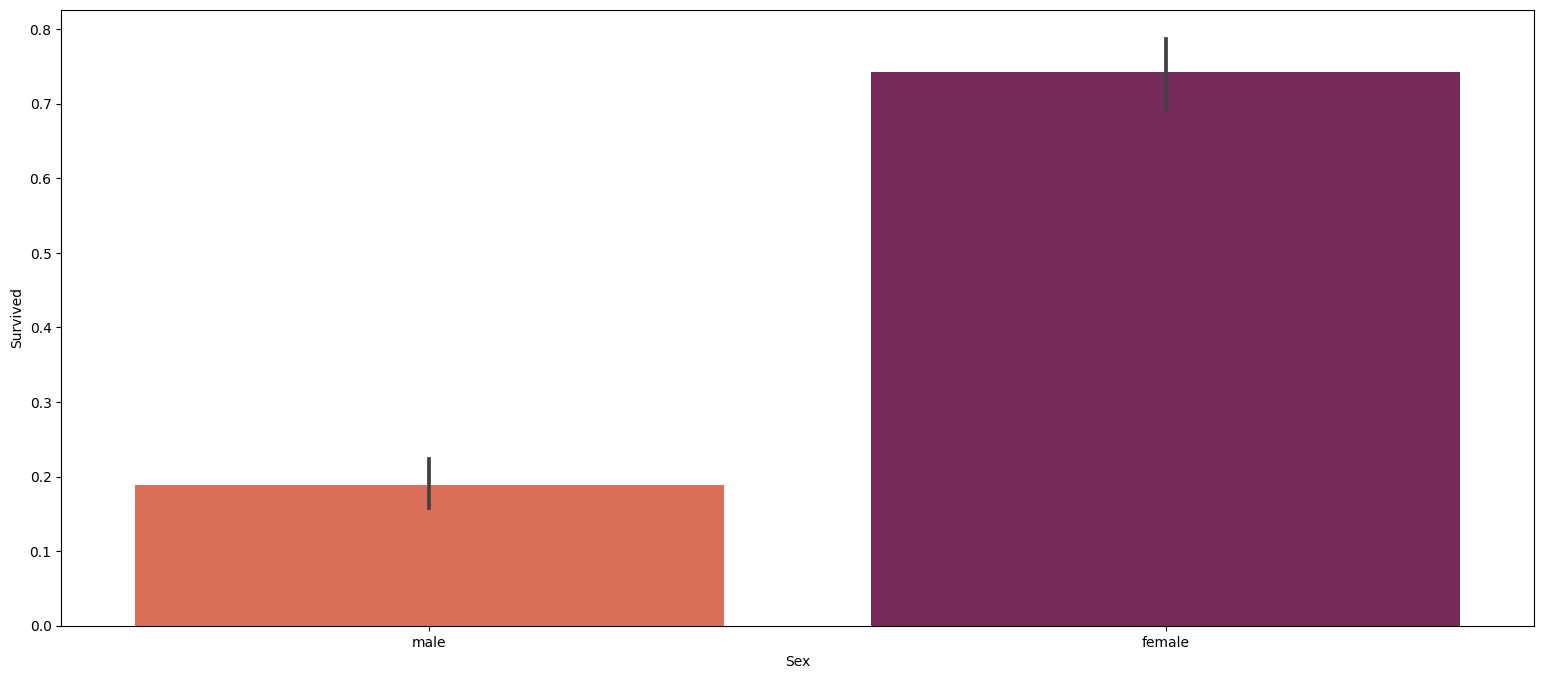

['Age', 'Fare', 'Cabin']


In [32]:
#sur_col = ['Sex', 'Survived']
#sur_col_count = df_train_original[sur_col].sum()
#print(sur_col)
#print(sur_col_count)

plt.figure(figsize=(19,8))

sns.barplot(y=df_train_original['Survived'], x=df_train_original['Sex'], palette='rocket_r')
plt.show()
print(nan_cols)

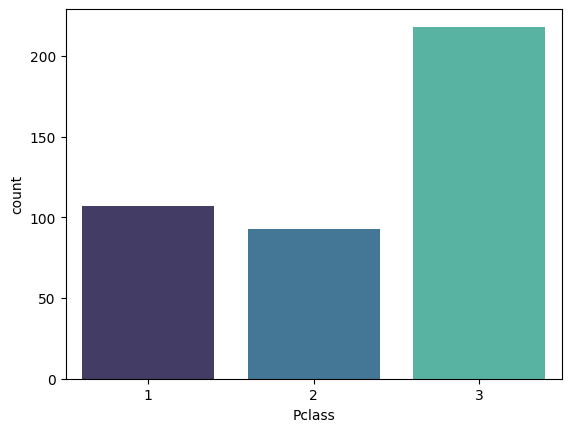

PASSENGER CLASS COUNTS:

First Class Passengers: 216 

Second Class Passengers: 184 

Third Class Passengers: 491 



In [33]:
sns.countplot(x='Pclass', data=df_test_original, palette='mako')
plt.show()
print(colored("PASSENGER CLASS COUNTS:\n", 'magenta', attrs=['bold', 'underline']))
print(colored(f"First Class Passengers: {df_train_original[df_train_original['Pclass']==1].count()[0]}", "cyan", attrs=['bold']),'\n')
print(colored(f"Second Class Passengers: {df_train_original[df_train_original['Pclass']==2].count()[0]}", "cyan", attrs=['bold']),'\n')
print(colored(f"Third Class Passengers: {df_train_original[df_train_original['Pclass']==3].count()[0]}", "cyan", attrs=['bold']),'\n')

In [34]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S


**Survival Rate based on each class**

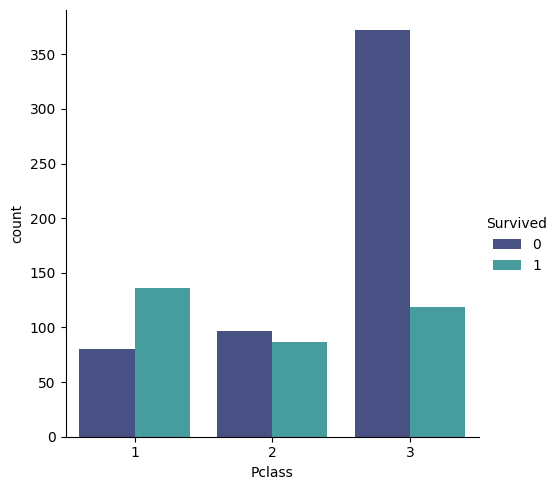

In [35]:
sns.catplot(x="Pclass",  kind="count", hue='Survived', data=df_train_original, palette='mako')

In [36]:
SURVIVED_CLASS_LIST = df_train_original.value_counts(["Pclass", "Survived"], sort=False).to_numpy()

In [37]:
SURVIVED_CLASS_LIST

array([ 80, 136,  97,  87, 372, 119], dtype=int64)

<AxesSubplot:xlabel='Sex', ylabel='count'>

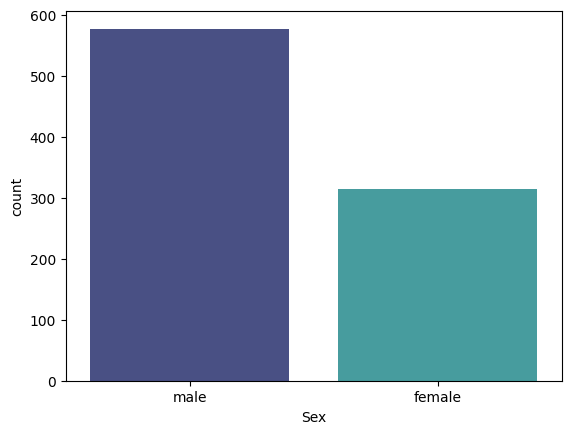

In [38]:
sns.countplot(x="Sex", data= df_train_original, palette="mako")

In [39]:
df_train_original.value_counts(["Sex"], sort=False)

Sex   
female    314
male      577
dtype: int64

In [40]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

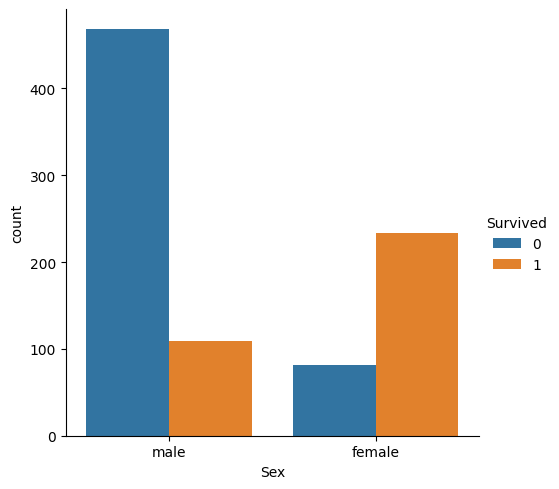

In [41]:
sns.catplot(x="Sex", kind="count", hue="Survived", data=df_train_original)

In [42]:
df_train_original.value_counts(["Sex", "Survived"], sort=False)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

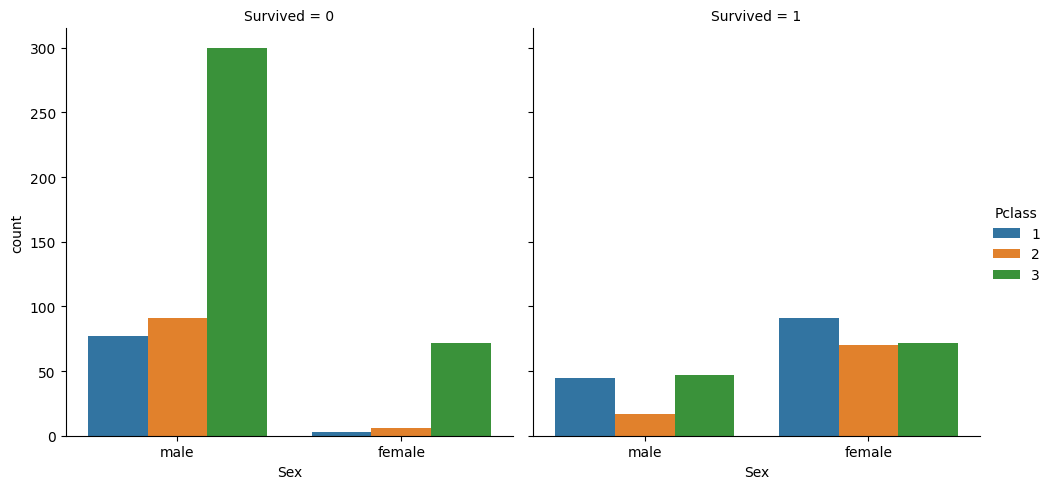

In [43]:
sns.catplot(x="Sex", col="Survived",hue="Pclass", kind="count", data=df_train_original)
plt.show()

In [44]:
df_train_original.value_counts(["Sex", "Survived", "Pclass"], sort=False).to_numpy

<bound method IndexOpsMixin.to_numpy of Sex     Survived  Pclass
female  0         1           3
                  2           6
                  3          72
        1         1          91
                  2          70
                  3          72
male    0         1          77
                  2          91
                  3         300
        1         1          45
                  2          17
                  3          47
dtype: int64>

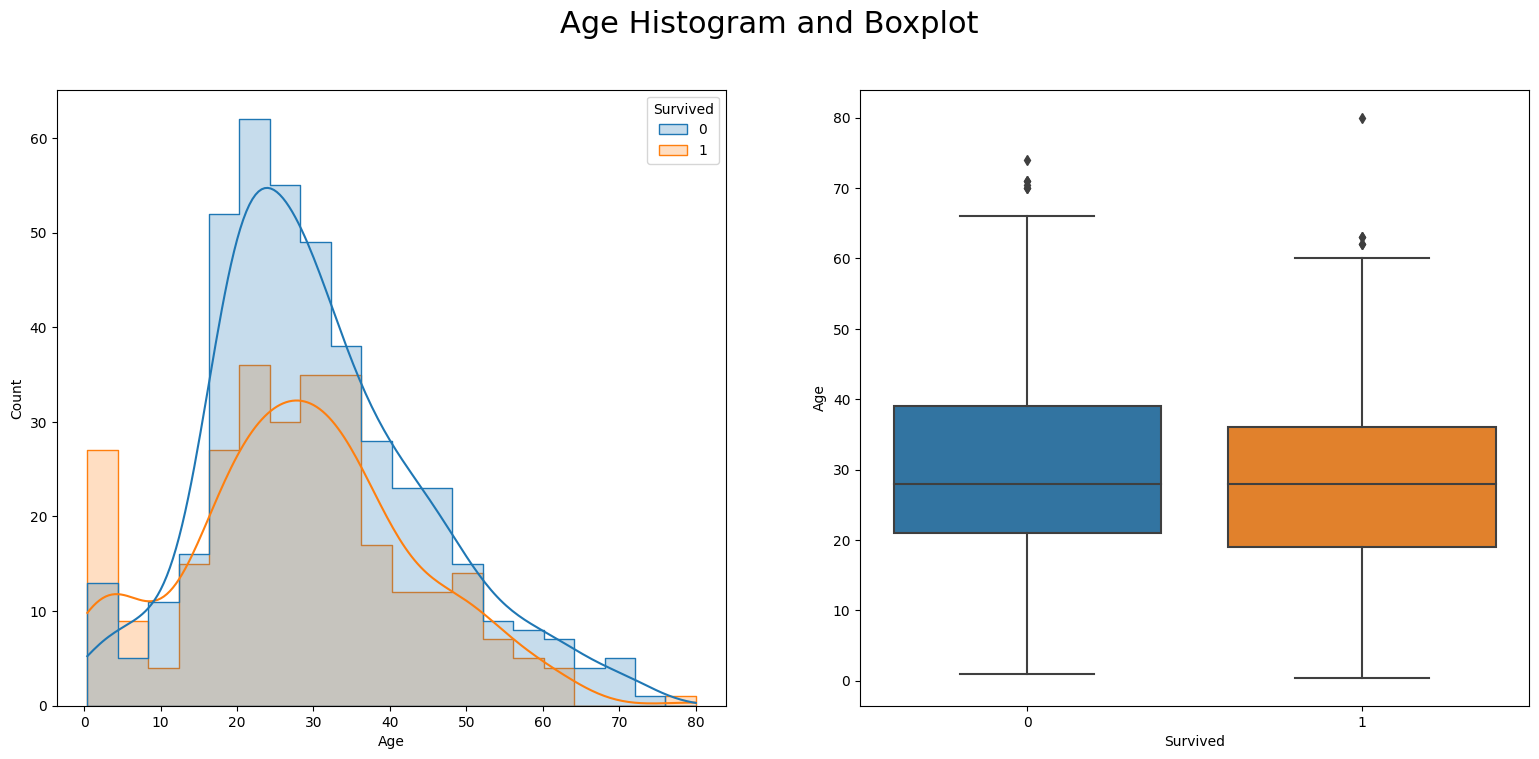

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(19,8))
fig.suptitle('Age Histogram and Boxplot', size=22)
sns.histplot(x='Age', data=df_train_original, hue='Survived', kde=True, element='step', ax=ax[0])
sns.boxplot(x='Survived', y='Age', data=df_train_original, ax=ax[1])
plt.show()


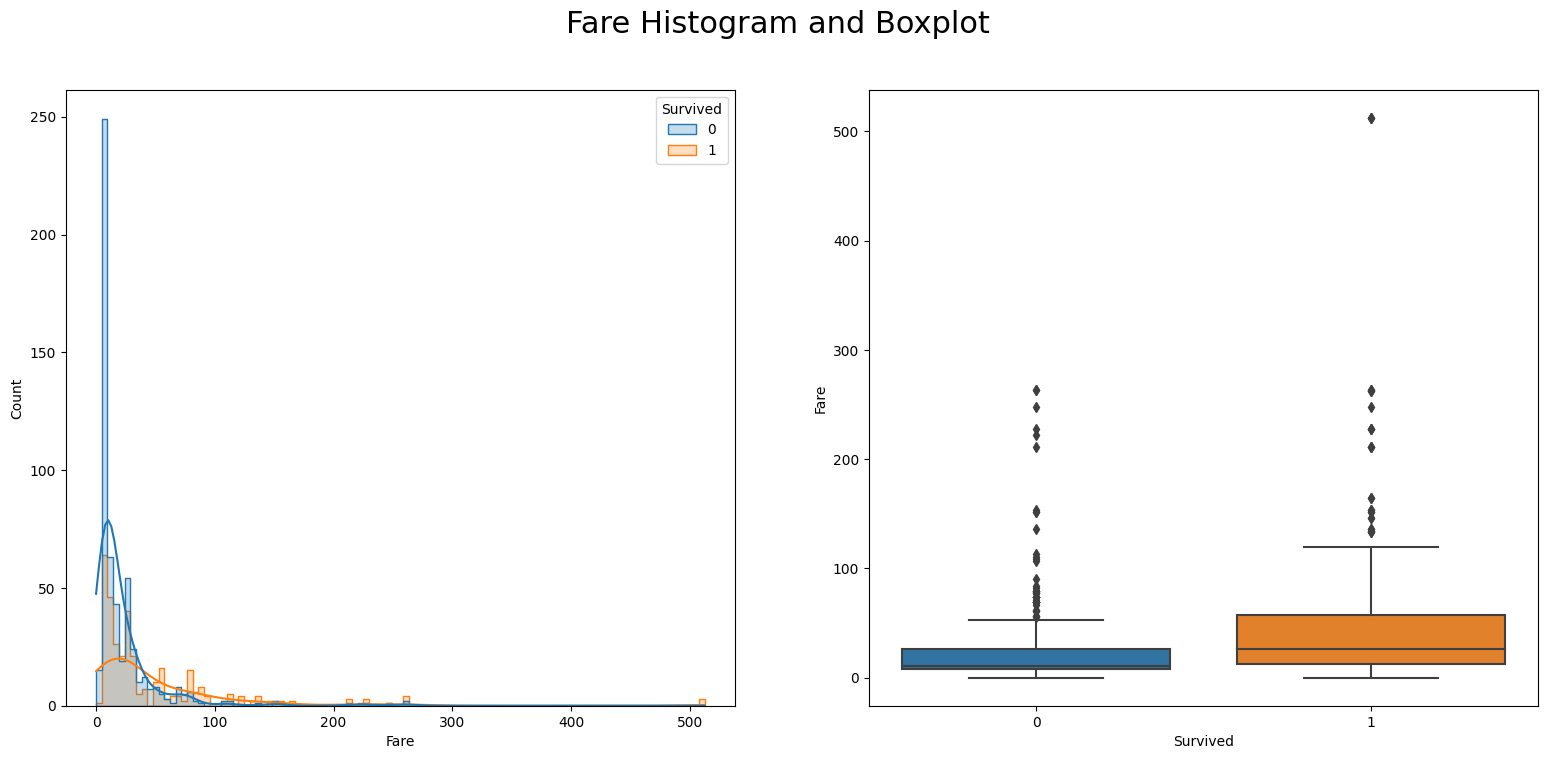

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(19,8))
fig.suptitle('Fare Histogram and Boxplot', size=22)
sns.histplot(x='Fare', data=df_train_original, hue='Survived', kde=True, element='step', ax=ax[0])
sns.boxplot(x='Survived', y='Fare', data=df_train_original, ax=ax[1])
plt.show()

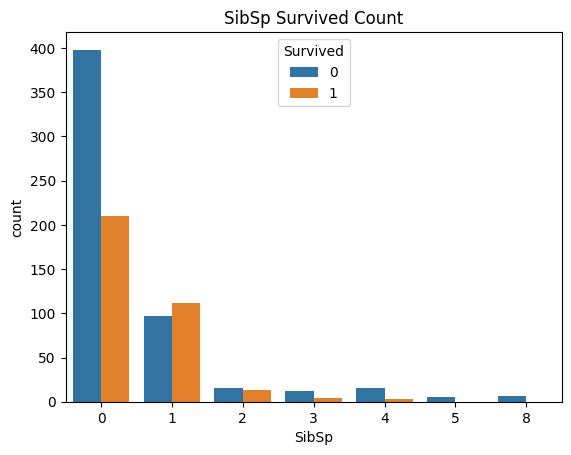

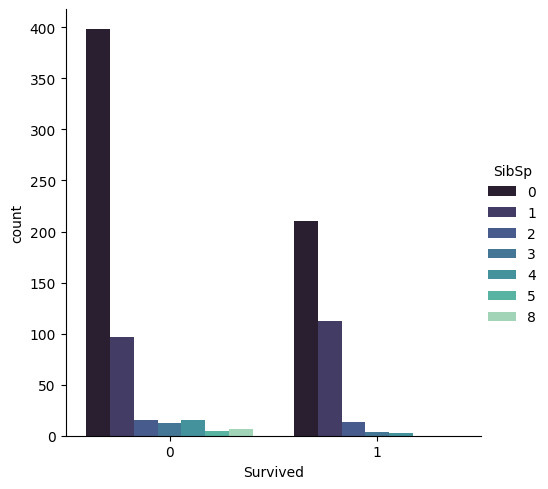

In [47]:
sns.countplot(hue = "Survived", x = "SibSp", data=df_train_original)
plt.title("SibSp Survived Count")
plt.show()
sns.catplot(x="Survived", kind="count", hue='SibSp', data=df_train_original, palette='mako', )


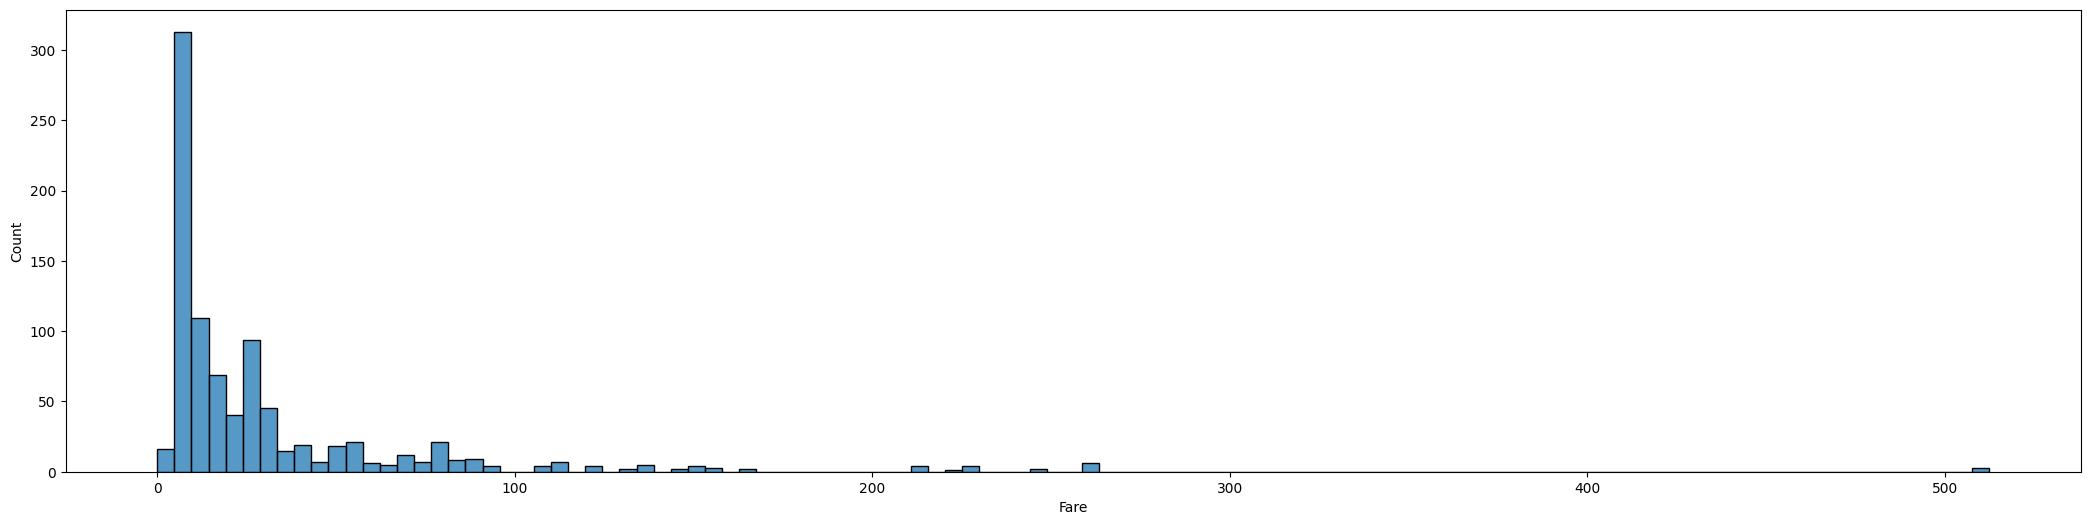

In [48]:
plt.figure(figsize=(26, 6))
sns.histplot(data=df_train_original, x='Fare', palette='mako')
plt.show()

In [49]:
col = ['Survived', 'Pclass', 'Sex', 'SibSp']
for i in col:
    print(df_train[i].unique())

[0 1]
[3 1 2]
['male' 'female']
[1 0 3 4 2 5]


In [50]:
print (df_train['Fare'].mean(),df_train['Fare'].max(),
df_train['Fare'].min())

34.567251404494385 512.3292 0.0


In [51]:
df_train_original.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test_original.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

#### Deal with categorical variables

In [52]:
categoricalVars = ["Sex", "Embarked"]
oneHotEncoder = OneHotEncoder(sparse=False, drop="first")


trainEncoded = oneHotEncoder.fit_transform(df_train_original[categoricalVars])
encoderFeatureNames = oneHotEncoder.get_feature_names(categoricalVars)


trainEncoded = pd.DataFrame(trainEncoded,columns = encoderFeatureNames)
train = pd.concat([df_train_original.reset_index(drop=True),trainEncoded.reset_index(drop=True)],axis=1)
train.drop(categoricalVars,axis=1,inplace=True)



In [53]:
trainEncoded.head()

,Sex_male,Embarked_Q,Embarked_S,Embarked_nan
0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0


In [54]:
trainEncoded.reset_index(drop=True)

,Sex_male,Embarked_Q,Embarked_S,Embarked_nan
0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0
...,...,...,...,...
886,1.0,0.0,1.0,0.0
887,0.0,0.0,1.0,0.0
888,0.0,0.0,1.0,0.0
889,1.0,0.0,0.0,0.0


In [55]:

df_train_original.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [56]:
df_train_original.reset_index(drop=True)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [63]:
train.head(6)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0,0.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,0.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,0.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0,0.0
5,6,0,3,NaN,0,0,8.4583,1.0,1.0,0.0,0.0


#### Deal with Numerical variables
here we are going to transform the numerical variables like ***Fare and Age***

In [58]:
numeric = ['Age', 'SibSp', 'Parch', 'Fare']

# .values retorna un arreglo de NumPy.
X_numeric = df_train_original[numeric].values
scaler = MinMaxScaler(feature_range=(0, 1))  
X_numeric = scaler.fit_transform(X_numeric) 



In [59]:
print(X_numeric)

[[0.27117366 0.125      0.         0.01415106]
 [0.4722292  0.125      0.         0.13913574]
 [0.32143755 0.         0.         0.01546857]
 ...
 [       nan 0.125      0.33333333 0.04577135]
 [0.32143755 0.         0.         0.0585561 ]
 [0.39683338 0.         0.         0.01512699]]


In [60]:
X_full = np.concatenate((X_numeric, train),
                        axis=1)

In [64]:
print(X_full)

[[0.27117366 0.125      0.         ... 0.         1.         0.        ]
 [0.4722292  0.125      0.         ... 0.         0.         0.        ]
 [0.32143755 0.         0.         ... 0.         1.         0.        ]
 ...
 [       nan 0.125      0.33333333 ... 0.         1.         0.        ]
 [0.32143755 0.         0.         ... 0.         0.         0.        ]
 [0.39683338 0.         0.         ... 1.         0.         0.        ]]


In [62]:
y = df_train_original["Survived"]
print(y.shape)
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(df_train_original[features])
print(X.shape)
X_test = pd.get_dummies(df_test_original[features])
print(X_test.shape)
model = RandomForestClassifier(n_estimators=1000, max_depth=50, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
print(predictions.shape)
print(df_test_original.shape)
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('my_prediction_Cesar.csv', index=False)
#print("Your submission was successfully saved!")

(891,)
(891, 5)
(418, 5)
(418,)
(418, 8)
